In [1]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
from PIL import Image
import os
from tifffile import imread
import matplotlib.pyplot as plt
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible
from plot_utils import singleplot, plotXY, doubleplot
from GaussFit import StripFit, Linescan
from HoughLine import show_hough_linetransform, show_ransac_points_line

In [2]:
targetdir = '/Users/aimachine/Downloads/h_variation/Actin20/Result/'

Actinimage = '/Users/aimachine/Downloads/h_variation/Actin20/ActinLineScan.tif'

Membraneimage = '/Users/aimachine/Downloads/h_variation/Actin20/MembraneLineScan.tif'

#Enter time unit in seconds
Time_unit = 1
#Enter pixel to micrometer conversion
Xcalibration = 0.069
#Enter the number of pixels to be included in the fit
FitaroundInside = 20
FitaroundOutside = 30
#Symmetric psf as input (micrometers)
psf = 0.170
inisigmaguess =  psf/Xcalibration

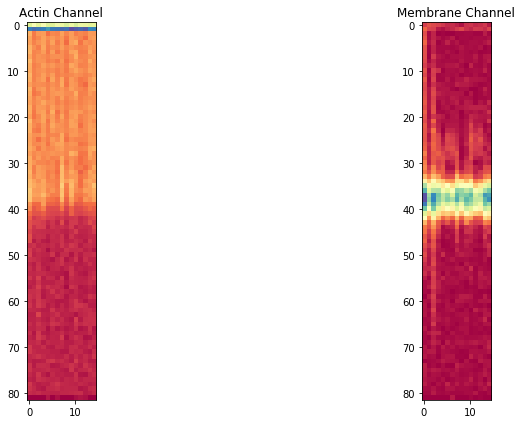

In [3]:
Actin = imread(Actinimage)
Membrane = imread(Membraneimage)
doubleplot(Actin, Membrane, 'Actin Channel', 'Membrane Channel')


/Users/aimachine/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Time point: 0


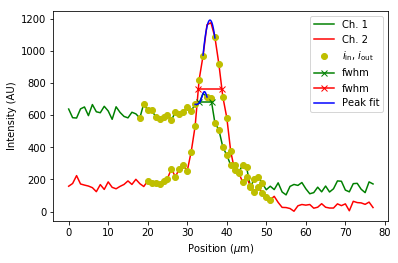

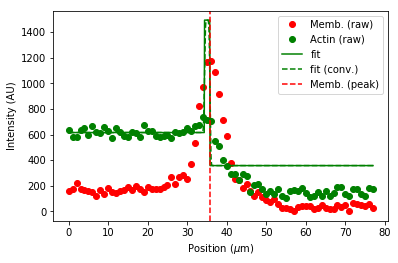

/Users/aimachine/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/aimachine/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Ransac Slope =  2.772e-02
Regression Slope =  4.142e-01
Mean Thickness (After outlier removal) =  0.354 um


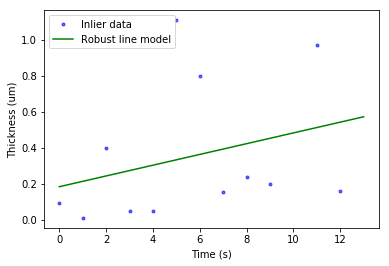

CPU times: user 8.89 s, sys: 83 ms, total: 8.97 s
Wall time: 8.94 s


In [4]:
%%time
Thickness, Time = StripFit(Actin, Membrane, Time_unit, Xcalibration, FitaroundInside, FitaroundOutside, psf, inisigmaguess)
Thickness_time = np.column_stack([Time, Thickness])

show_ransac_points_line(Thickness_time, min_samples=2, residual_threshold=0.9, max_trials=1000, Xrange = Time[-1], displayoutlier = False)

In [10]:
from bokeh.models import Label
from bokeh.plotting import figure, show, output_notebook
hist, edges = np.histogram(np.abs(Thickness), density=False, bins='auto')
p = figure(title="Estimated Cortex Thickness = " + str('%.5f'%edges[np.argmax(hist)]), y_axis_label='Counts',x_axis_label='Velocity(um/sec)')
listedges = edges.tolist()
listhist = hist.tolist()
output_notebook()
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
    fill_color="#036564", line_color="#033649")
for  i in range(0,len(listhist)):
 if listhist[i] > 0:
  mytext = Label(x=listedges[i], y=listhist[i], text=str('%.2f'%listedges[i]))
  p.add_layout(mytext)
show(p)

Loading BokehJS ...